### Load Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
cv2.__version__

'4.2.0'

### Check Camera

In [27]:
cam = cv2.VideoCapture(0)
ret, frame = cam.read()
cv2.waitKey(0)
cam.release()

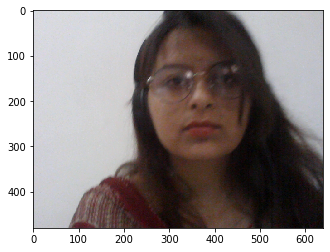

In [28]:
img = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [31]:
#To write image in a folder
cv2.imwrite("aman.jpg",img)

True

In [6]:
webcam = cv2.VideoCapture(0)
cv2.namedWindow("OpenCV",cv2.WINDOW_NORMAL)

while True:
    ret,frame = webcam.read()
    cv2.imshow("OpenCV",frame)
    
    if cv2.waitKey(10) == ord("q"):
        break
webcam.release()
cv2.destroyAllWindows()

### Opencv Image Manipulation functions
- Camera Start - Capture Image
- Draw Rectangle
- Cut face
- Normalize
- Gray Scale

In [9]:
def detect_face(frame):
    detector = cv2.CascadeClassifier("xml/frontal_face.xml")
    faces = detector.detectMultiScale(frame,1.2)
    return faces

In [10]:
def gray_scale(image):
    img = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    return img

In [11]:
frame.max()

253

### Cut faces

In [12]:
def cut_face(image,faces_coord):
    faces = []
    for (x,y,w,h) in faces_coord:
        faces.append(image[y:y+h, x:x+w])
    return faces

### Increasing Pixel Intensity

In [13]:
def increase_intensity(images):
    img_norm = []
    for img in images:
        img_norm.append(cv2.equalizeHist(img))
    return img_norm

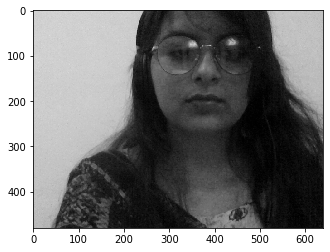

In [14]:
gray = gray_scale(frame)
plt.imshow(gray,cmap="gray")

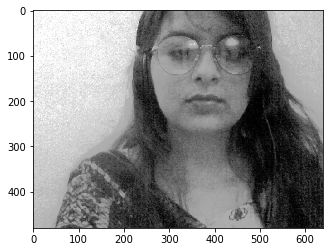

In [15]:
norm = cv2.equalizeHist(gray)
plt.imshow(norm,cmap="gray")

### Resize

In [16]:
def resize(images,size=(50,60)):
    resized = []
    for img in images:
        img_size = cv2.resize(img,size)
        resized.append(img_size)
    return resized

### Make Pipeline

In [17]:
def final_faces(frame,face_coord):
    faces = cut_face(frame,face_coord)
#     faces = increase_intensity(faces)
    faces = resize(faces)
    return faces

In [18]:
def plot_faces(image,title=""):
    if image.ndim == 3:
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.title(title)
    plt.axis("off")
    plt.imshow(image,cmap="gray")
    plt.show()

In [29]:
def draw_rectange(image,coord):
    for (x,y,w,h) in coord:
        cv2.rectangle(image, (x,y), (x+w,y+h),(0,0,255),2)

### Create Your Dataset

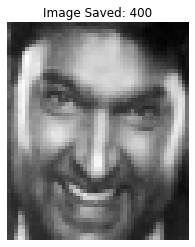

In [100]:
from IPython.display import clear_output

cam = cv2.VideoCapture(0)
name = input("Please Enter Your Name: ")
folder = "users/"+name
no_of_samples=400
import os

if not os.path.exists(folder):
    os.mkdir(folder)
    capturing=False
    sample = 1
    cv2.namedWindow(name, cv2.WINDOW_NORMAL)
    
    while True:
        ret,frame = cam.read()
        gray = gray_scale(frame)
        face_coord = detect_face(gray)
        
        if len(face_coord)==1:
            faces = final_faces(gray,face_coord)
            cv2.imwrite(folder+"/"+str(sample)+".jpg",faces[0])
            plot_faces(faces[0],"Image Saved: "+str(sample))
            clear_output(wait=True)

            if capturing==True:
                sample +=1
        else:
            print("There must be exactly one face")
        draw_rectange(frame,face_coord)
        cv2.imshow(name,frame)
        key = cv2.waitKey(1)
        
        if key==ord("q"):
            break
        if key==ord("c"):
            if capturing == False:
                capturing = True
        if sample>no_of_samples:
            break
            
    cam.release()
    cv2.destroyAllWindows()
else:
    print("A user with this name already exists!!")

### Create Unknown dataset

In [38]:
data = os.listdir("lfw_home/lfw_funneled/")
data
images = data[:no_of_samples]
# print(images)

In [47]:
for i,v in enumerate([100,200,30],start=2):
    print(i,v)

2 100
3 200
4 30


In [51]:
images = data[:no_of_samples]

if os.path.exists("users/unknown"):
    print("Dataset of unknown people already exist!")
else:
    os.mkdir("users/unknown")
    for i,folder_name in enumerate(images,start=1):
    #     print(i,folder_name)
        path = "lfw_home/lfw_funneled/"+folder_name
        files = os.listdir(path)
        for k,img in enumerate(files,start=1):
            frame = cv2.imread(path+"/"+img,0)

            face_coord = detect_face(frame)
            if len(face_coord):
                face = cut_face(frame,face_coord)
                face = resize(face)
                cv2.imwrite("users/unknown/"+str(i)+".jpg",face[0])
                print(img,"Saved!")
        

Aaron_Eckhart_0001.jpg Saved!
Aaron_Guiel_0001.jpg Saved!
Aaron_Patterson_0001.jpg Saved!
Aaron_Peirsol_0001.jpg Saved!
Aaron_Peirsol_0002.jpg Saved!
Aaron_Peirsol_0003.jpg Saved!
Aaron_Peirsol_0004.jpg Saved!
Aaron_Pena_0001.jpg Saved!
Aaron_Sorkin_0001.jpg Saved!
Aaron_Sorkin_0002.jpg Saved!
Aaron_Tippin_0001.jpg Saved!
Abbas_Kiarostami_0001.jpg Saved!
Abba_Eban_0001.jpg Saved!
Abdel_Aziz_Al-Hakim_0001.jpg Saved!
Abdel_Madi_Shabneh_0001.jpg Saved!
Abdel_Nasser_Assidi_0001.jpg Saved!
Abdel_Nasser_Assidi_0002.jpg Saved!
Abdoulaye_Wade_0001.jpg Saved!
Abdoulaye_Wade_0002.jpg Saved!
Abdoulaye_Wade_0003.jpg Saved!
Abdoulaye_Wade_0004.jpg Saved!
Abdulaziz_Kamilov_0001.jpg Saved!
Abdullah_0001.jpg Saved!
Abdullah_0002.jpg Saved!
Abdullah_0003.jpg Saved!
Abdullah_0004.jpg Saved!
Abdullah_Ahmad_Badawi_0001.jpg Saved!
Abdullah_al-Attiyah_0001.jpg Saved!
Abdullah_al-Attiyah_0002.jpg Saved!
Abdullah_al-Attiyah_0003.jpg Saved!
Abdullah_Gul_0001.jpg Saved!
Abdullah_Gul_0002.jpg Saved!
Abdullah_Gul

Alek_Wek_0001.jpg Saved!
Alessandra_Cerna_0001.jpg Saved!
Alessandro_Nesta_0001.jpg Saved!
Alexander_Downer_0001.jpg Saved!
Alexander_Downer_0002.jpg Saved!
Alexander_Downer_0003.jpg Saved!
Alexander_Downer_0004.jpg Saved!
Alexander_Losyukov_0001.jpg Saved!
Alexander_Losyukov_0002.jpg Saved!
Alexander_Losyukov_0003.jpg Saved!
Alexander_Losyukov_0004.jpg Saved!
Alexander_Lukashenko_0001.jpg Saved!
Alexander_Payne_0001.jpg Saved!
Alexander_Rumyantsev_0001.jpg Saved!
Alexander_Rumyantsev_0002.jpg Saved!
Alexandra_Jackson_0001.jpg Saved!
Alexandra_Pelosi_0001.jpg Saved!
Alexandra_Rozovskaya_0001.jpg Saved!
Alexandra_Spann_0001.jpg Saved!
Alexandra_Stevenson_0001.jpg Saved!
Alexandra_Stevenson_0002.jpg Saved!
Alexandra_Stevenson_0003.jpg Saved!
Alexandra_Vodjanikova_0001.jpg Saved!
Alexandra_Vodjanikova_0002.jpg Saved!
Alexandre_Daigle_0001.jpg Saved!
Alexandre_Despatie_0001.jpg Saved!
Alexandre_Herchcovitch_0001.jpg Saved!
Alexandre_Vinokourov_0001.jpg Saved!
Alexa_Loren_0001.jpg Saved!
Al

Andrei_Konchalovsky_0001.jpg Saved!
Andrei_Mikhnevich_0001.jpg Saved!
Andrei_Mikhnevich_0002.jpg Saved!
Andrei_Nikolishin_0001.jpg Saved!
Andres_DAlessandro_0001.jpg Saved!
Andres_Manuel_Lopez_Obrador_0001.jpg Saved!
Andres_Pastrana_0001.jpg Saved!
Andrew_Bernard_0001.jpg Saved!
Andrew_Bunner_0001.jpg Saved!
Andrew_Bunner_0002.jpg Saved!
Andrew_Caldecott_0001.jpg Saved!
Andrew_Cuomo_0001.jpg Saved!
Andrew_Cuomo_0002.jpg Saved!
Andrew_Fastow_0001.jpg Saved!
Andrew_Firestone_0001.jpg Saved!
Andrew_Gilligan_0001.jpg Saved!
Andrew_Jarecki_0001.jpg Saved!
Andrew_Luster_0001.jpg Saved!
Andrew_Niccol_0001.jpg Saved!
Andrew_Niccol_0002.jpg Saved!
Andrew_Sabey_0001.jpg Saved!
Andrew_Shutley_0001.jpg Saved!
Andrew_Weissmann_0001.jpg Saved!
Andrew_Weissmann_0002.jpg Saved!
Andrew_Weissmann_0003.jpg Saved!
Andrew_Wetzler_0001.jpg Saved!
Andre_Agassi_0001.jpg Saved!
Andre_Agassi_0002.jpg Saved!
Andre_Agassi_0003.jpg Saved!
Andre_Agassi_0004.jpg Saved!
Andre_Agassi_0005.jpg Saved!
Andre_Agassi_0006.

Ariel_Sharon_0016.jpg Saved!
Ariel_Sharon_0017.jpg Saved!
Ariel_Sharon_0018.jpg Saved!
Ariel_Sharon_0019.jpg Saved!
Ariel_Sharon_0020.jpg Saved!
Ariel_Sharon_0021.jpg Saved!
Ariel_Sharon_0022.jpg Saved!
Ariel_Sharon_0023.jpg Saved!
Ariel_Sharon_0024.jpg Saved!
Ariel_Sharon_0025.jpg Saved!
Ariel_Sharon_0026.jpg Saved!
Ariel_Sharon_0027.jpg Saved!
Ariel_Sharon_0028.jpg Saved!
Ariel_Sharon_0029.jpg Saved!
Ariel_Sharon_0030.jpg Saved!
Ariel_Sharon_0031.jpg Saved!
Ariel_Sharon_0032.jpg Saved!
Ariel_Sharon_0033.jpg Saved!
Ariel_Sharon_0034.jpg Saved!
Ariel_Sharon_0035.jpg Saved!
Ariel_Sharon_0036.jpg Saved!
Ariel_Sharon_0037.jpg Saved!
Ariel_Sharon_0038.jpg Saved!
Ariel_Sharon_0039.jpg Saved!
Ariel_Sharon_0040.jpg Saved!
Ariel_Sharon_0041.jpg Saved!
Ariel_Sharon_0042.jpg Saved!
Ariel_Sharon_0043.jpg Saved!
Ariel_Sharon_0044.jpg Saved!
Ariel_Sharon_0045.jpg Saved!
Ariel_Sharon_0046.jpg Saved!
Ariel_Sharon_0047.jpg Saved!
Ariel_Sharon_0048.jpg Saved!
Ariel_Sharon_0049.jpg Saved!
Ariel_Sharon_0

### Collect Dataset

In [101]:
def prepare_dataset():
    images =[]
    labels = []
    target = {}

    peoples = os.listdir("users/")
    for i,person in enumerate(peoples):
#         print(i,person)
        target[i]=person
        for img in os.listdir("users/"+person):
            path= "users/"+person+"/"+img
            im = cv2.imread(path,0)
            images.append(im)
            labels.append(i)    
    return (images,np.array(labels),target)


In [102]:
prepare_dataset()

([array([[ 56,  56,  52, ..., 157, 175, 180],
         [ 46,  44,  44, ..., 143, 173, 179],
         [ 49,  36,  52, ...,  88, 161, 175],
         ...,
         [ 13,  11,  10, ...,  14,   3,   5],
         [ 16,  13,  14, ...,  11,   4,   5],
         [ 17,  15,  15, ...,  12,   6,   5]], dtype=uint8),
  array([[ 51,  48,  52, ...,  42, 130, 170],
         [ 41,  47,  44, ...,  35,  74, 168],
         [ 43,  40,  41, ...,  29,  37, 167],
         ...,
         [ 16,  18,  14, ...,   5,   7,   7],
         [ 19,  15,  13, ...,   6,   2,   6],
         [ 22,  14,  11, ...,   5,   1,   7]], dtype=uint8),
  array([[ 63,  56,  55, ..., 191, 188, 188],
         [ 56,  52,  52, ..., 187, 189, 189],
         [ 56,  48,  55, ..., 184, 188, 187],
         ...,
         [ 20,  19,  15, ...,  11,   9,   9],
         [ 19,  17,  15, ...,   9,  10,  10],
         [ 18,  17,  16, ...,   6,  12,  13]], dtype=uint8),
  array([[ 47,  61,  65, ..., 189, 191, 191],
         [ 44,  63,  57, ..., 182, 191,

In [103]:
img,label,target= prepare_dataset()

In [104]:
pd.Series(label).value_counts()

1    400
0    400
2    398
dtype: int64

In [105]:
label,target

(array([0, 0, 0, ..., 2, 2, 2]), {0: 'Aman', 1: 'Kapil', 2: 'unknown'})

In [106]:
len(img), img[397].shape

(1198, (60, 50))

In [107]:
target

{0: 'Aman', 1: 'Kapil', 2: 'unknown'}

In [108]:
print(type(img))

<class 'list'>


### Data Preprocessing

In [109]:
X_train = np.asarray(img)

In [110]:
print(type(X_train))

<class 'numpy.ndarray'>


In [111]:
# 70000,28,28  MNIST > 70000,784
X_train.shape

(1198, 60, 50)

In [78]:
60*50

3000

In [112]:
len(X_train)

1198

In [113]:
train = X_train.reshape(len(X_train),-1)
train.shape

(1198, 3000)

In [114]:
train.max(), train.min()

(255, 0)

Let's implement standardization (feature scaling)

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
sc = StandardScaler()
training_data = sc.fit_transform(train)

In [117]:
training_data.max(), training_data.mean(), training_data.var()

(4.998811298802858, -1.3968866871971519e-16, 1.0)

There are total 3000 columns, to select important columns let's implement PCA

In [118]:
training_data.shape

(1198, 3000)

In [119]:
from sklearn.decomposition import PCA

In [133]:
pca = PCA(.96)
pca_train=pca.fit_transform(training_data)

In [134]:
pca.n_components, pca.n_features_

(0.96, 3000)

In [135]:
pca_train.shape

(1198, 97)

### Build Model

In [130]:
from sklearn.svm import SVC

In [136]:
sv = SVC(kernel="linear",C=0.001,probability=True)
sv.fit(pca_train,label)


SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [137]:
sv.score(pca_train,label)

0.9958263772954925

### Save Model

In [138]:
import pickle

In [139]:
filename = "SVM_FACE_DETECTION.pkl"
with open(filename,"wb") as f_obj:
    pickle.dump(sv,f_obj)
print(filename,"written successfully")

SVM_FACE_DETECTION.pkl written successfully


### Use Saved Model

In [140]:
file = open("SVM_FACE_DETECTION.pkl","rb")
svm_model = pickle.load(file)
file.close()

In [141]:
svm_model

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Model Deployment

In [142]:
# cam = cv2.VideoCapture("dark4.mp4")
cam = cv2.VideoCapture(0)
cv2.namedWindow("Face Detection",cv2.WINDOW_NORMAL)

while True:
    ret, frame = cam.read()
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    face_coord = detect_face(gray)
    
    if len(face_coord):
        faces = final_faces(gray,face_coord)
        
        for i,face in enumerate(faces):
            f = face.reshape(1,-1)
            f = sc.transform(f)
            f = pca.transform(f)
            
            prd = svm_model.predict(f)
            prob=svm_model.predict_proba(f)
            name = target[prd[0]]
            
            if prob[0][prd[0]]>.90:
                cv2.putText(frame, name,(face_coord[i][0],face_coord[i][1]-20),
                           cv2.FONT_HERSHEY_COMPLEX,2,(0,0,255),2)
            
            
        draw_rectange(frame,face_coord)
    else:
        print("No face detected!")
    
    cv2.imshow("Face Detection",frame)
    if cv2.waitKey(10)==ord("q"):
        break
        
cam.release()
cv2.destroyAllWindows()
    

No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face detected!
No face de